In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [3]:
data_European_Rosters = pd.read_csv('/kaggle/input/european-football-market-values/European_Rosters.csv')
data_European_Rosters.head()

,FullName,PlayerName,Affiliation,League,Jersey,Birth Date,Age,birthPlace,Height (meters),Citizenship 1,...,Youth Club 7,nationality,Games Played,Market Value (Euros),Last Updated Date,Accumulated Transfer Sums (Euros),Highest Market Value (Euros),Highest Market Value Date,NationalTeamCaps,MostRecentInjury
0,Anthony Mbu Agogo Modeste,Anthony Modeste,1. FC Koln,Bundesliga,#27,4/14/1988,31,Cannes,1.87,France,...,NaN,France,1,7000000.0,"Last update: Jun 12, 2019",45700000,20000000.0,6/19/2017,16,NaN
1,NaN,Benno Schmitz,1. FC Koln,Bundesliga,#2,11/17/1994,25,München,1.82,Germany,...,NaN,Germany,0,1000000.0,"Last update: Jun 12, 2019",1000000,1750000.0,3/22/2017,11,NaN
2,Birger Danny Verstraete,Birger Verstraete,1. FC Koln,Bundesliga,#8,4/16/1994,25,Oostende,1.75,Belgium,...,NaN,Belgium,0,4000000.0,"Last update: Jun 10, 2019",4850000,4000000.0,9/11/2018,1,NaN
3,Brady Canfield Scott,Brady Scott,1. FC Koln,Bundesliga,#31,6/30/1999,20,"Petaluma, California",1.87,United States,...,NaN,United States,14,100000.0,"Last update: Jun 12, 2019",0,100000.0,8/3/2018,0,NaN
4,NaN,Christian Clemens,1. FC Koln,Bundesliga,#17,8/4/1991,28,Köln,1.79,Germany,...,NaN,Germany,15,1750000.0,"Last update: Jun 12, 2019",7950000,3500000.0,6/29/2013,5,NaN


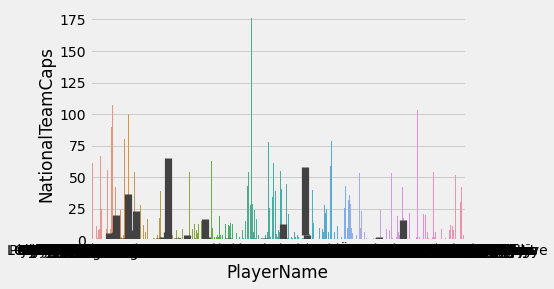

In [10]:
plt.style.use('fivethirtyeight')
sns.barplot(x='PlayerName', y='NationalTeamCaps', data=data_European_Rosters)

In [5]:
data_European_Rosters['League'].value_counts()

Serie A               547
Ligue 1               546
Bundesliga            533
Premier League        505
LaLiga                490
Eredivisie            486
Liga NOS              478
Premier Liga          413
Jupiler Pro League    310
Name: League, dtype: int64

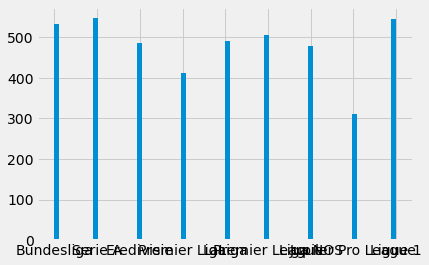

In [6]:
data_European_Rosters['League'].hist(bins=70)

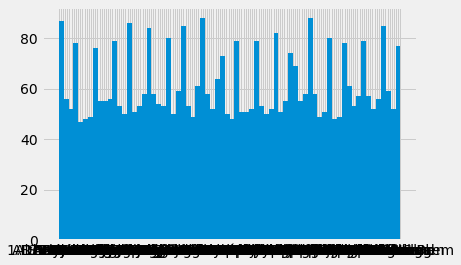

In [7]:
data_European_Rosters['Affiliation'].hist(bins=70)

In [8]:
data_European_Rosters['NationalTeamCaps'].quantile([0, 0.25, 0.75, 0.9])

0.00     0.0
0.25     0.0
0.75    12.0
0.90    33.0
Name: NationalTeamCaps, dtype: float64

In [9]:
data_European_Rosters['Market Value (Euros)'].quantile([0, 0.25, 0.75, 0.9])

0.00       25000.0
0.25      700000.0
0.75     8000000.0
0.90    20000000.0
Name: Market Value (Euros), dtype: float64

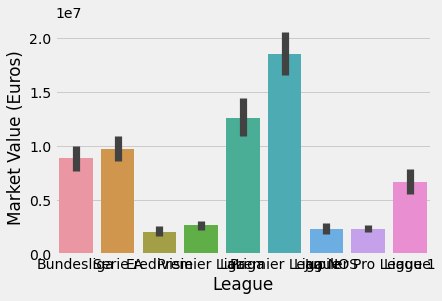

In [11]:
plt.style.use('fivethirtyeight')
sns.barplot(x='League', y='Market Value (Euros)', data=data_European_Rosters)

In [ ]:
plt.style.use('fivethirtyeight')
sns.pairplot(hue='League', data=data_European_Rosters)